# Merge & Analysis

In [1]:
library(data.table)
library(stringr)
library(ggplot2)
library(psych)


Attaching package: ‘psych’

The following objects are masked from ‘package:ggplot2’:

    %+%, alpha



In [2]:
negativity <- function(df_test) {
test <- copy(df_test)
actions <- colnames(test)[5:9]
neg_actions <- colnames(test)[5:7]


test$num_actions <- rep(NA, nrow(test))
test$num_negactions <- rep(NA, nrow(test))

for(j in 1:nrow(test)){
  
  num_allactions <- 0
  for(i in which(colnames(test) %in% actions)){
    test[j,i] <- ifelse(test[j,i]=="[]", NA, test[j,i]) # replace empty list with NA
    allnum <- as.list(strsplit(test[,i], ",")[[j]])
    num_allactions <- sum(num_allactions, length(allnum[!is.na(allnum)]))
  }
  test$num_actions[j] <- num_allactions + test$oadds...in.[j]
  
  
  num_negactions <- 0
  for(k in which(colnames(test) %in% neg_actions)){
    negnum <- as.list(strsplit(test[,k], ",")[[j]])
    num_negactions <- sum(num_negactions, length(negnum[!is.na(negnum)]))
  }
  test$num_negactions[j] <- num_negactions
}


    return(test$num_negactions/test$num_actions)
}

In [3]:
oneOBigger <- function(nn){
    if (nn > 0) {
        return(nn)
    } else {
        return(1)
    }
}
duration.2 <- function(myvar, window = 5) {
    
    durc <- integer(nrow(myvar))
    for (current_line in 1:nrow(myvar)){
            current_auth_both <- union(myvar$s_author[current_line], myvar$t_author[current_line])
            past_auth_in_window <- myvar[c((oneOBigger(current_line-window)):current_line),c("s_author","t_author")]
            durc[current_line] <- sum(is.element(past_auth_in_window$s_author, current_auth_both) & is.element(past_auth_in_window$t_author, current_auth_both))
        }
     return(durc)
}

In [4]:
received_negativity <- function(myvar) {
  
    durc <- integer(nrow(myvar))
    for (current_line in 1:nrow(myvar)){
         
        current_target = myvar$t_revision[current_line]
        current_s_author = myvar$s_author[current_line]
        
        set1 <- myvar[myvar$s_revision == current_target & myvar$t_author == current_s_author,]
        
        durc[current_line] <- (sum(str_count(set1$deleted...out, "'")) / 2) + ( sum(str_count(set1$undo_delete...in, "'")) / 2) +  ( sum(str_count(set1$undo_reintro...out, "'")) / 2)
        
        }
     return(durc)
}

In [18]:
negativity.2 <- function(test) {
#actions <- colnames(test)[5:9]
#neg_actions <- colnames(test)[5:7]
actions <- c(which(colnames(test)=="deleted...out."):which(colnames(test)=="oadds...in."))
neg_actions <- c(which(colnames(test)=="deleted...out."):which(colnames(test)=="undo_delete...in." ))

test$num_actions <- rep(NA, nrow(test))
test$num_negactions <- rep(NA, nrow(test))

for(j in 1:nrow(test)){
  
  num_allactions <- 0
  for(i in actions){
    test[j,i] <- ifelse(test[j,i]=="[]", NA, test[j,i]) # replace empty list with NA
    allnum <- as.list(strsplit(test[,i], ",")[[j]])
    num_allactions <- sum(num_allactions, length(allnum[!is.na(allnum)]))
  }
  test$num_actions[j] <- num_allactions
  
  
  num_negactions <- 0
  for(k in neg_actions){
    negnum <- as.list(strsplit(test[,k], ",")[[j]])
    num_negactions <- sum(num_negactions, length(negnum[!is.na(negnum)]))
  }
  test$num_negactions[j] <- num_negactions
}


    return(test$num_negactions/test$num_actions)
}

In [5]:
negativity.noads <- function(test) {

    
actions <- c(which(colnames(test)=="deleted...out."):which(colnames(test)=="oadds...in."))
neg_actions <- c(which(colnames(test)=="deleted...out."):which(colnames(test)=="undo_delete...in." ))
lastneg_action <- which(colnames(test)=="undo_delete...in.")


test$num_actions <- rep(NA, nrow(test))
test$num_negactions <- rep(NA, nrow(test))

for(j in 1:nrow(test)){
  
  num_allactions <- 0
  for(i in actions_omitoadd){
    allnum <- as.list(strsplit(test[,i], ",")[[j]])
    num_allactions <- sum(num_allactions, length(allnum[allnum!="[]"]))
    if(i==lastneg_action){test$num_negactions[j] <- num_allactions}
  }
  test$num_actions[j] <- num_allactions
  
}


    return(test$num_negactions/test$num_actions)
    
}

In [5]:
data <- read.csv("data/eire_df_plus_w_van.csv", sep="\t", stringsAsFactors = F)

In [6]:
data['duration.2'] <- duration.2(data, window = 30)

In [7]:
data['received_negativity'] <- received_negativity(data)

In [ ]:
data['negativity.2'] <- negativity.2(data)

In [8]:
data['negativity.noads'] <- negativity.2(data)

In [8]:
head(data)

X,s_revision,s_author,t_revision,t_author,deleted...out.,undo_reintro...out.,undo_delete...in.,reintroduced...in.,redeleted...out.,⋯,comment,minor,size,timestamp,userid,userinfo,all_actions_count,ratio_swords,duration.2,received_negativity
0,430957,Jtdirl,430952,David Parker,['eire'],[],[],[],[],⋯,,NA,570,2002-11-18T02:51:49Z,5511,"(24201, ['extendedconfirmed', '*', 'user', 'autoconfirmed'], '2002-02-25T15:51:15Z')",31,0.00000000,1,0
1,431834,Derek Ross,430952,David Parker,"['<', 'b', '>', '</', 'b', '>']",[],[],[],[],⋯,sp,NA,766,2002-11-18T09:12:36Z,33,"(19970, ['sysop', '*', 'user', 'autoconfirmed'], '2001-11-14T21:02:41Z')",53,0.13114754,1,0
2,431838,Jtdirl,430952,David Parker,"['1949', 'of', 'in', '.', 'name', '-', 'to', 'former', 'subsequently', 'ending', 'its', 'formal', 'allegiance', 'british']",[],[],[],[],⋯,,NA,2017,2002-11-18T11:16:22Z,5511,"(24201, ['extendedconfirmed', '*', 'user', 'autoconfirmed'], '2002-02-25T15:51:15Z')",2484,0.05802048,2,0
3,446146,Jtdirl,430952,David Parker,"['the', 'to', ',', 'change', ""country's"", 'name', 'though']",[],[],[],[],⋯,,NA,2063,2002-11-18T11:19:20Z,5511,"(24201, ['extendedconfirmed', '*', 'user', 'autoconfirmed'], '2002-02-25T15:51:15Z')",206,0.05936073,3,0
4,449694,66.167.130.30,430952,David Parker,"['fianna', 'fail', '|']",[],[],[],[],⋯,Snap redirect,NA,2051,2002-11-26T08:14:24Z,0,,33,0.02941176,1,0
5,669413,159.134.137.58,431838,Jtdirl,['saorstat'],[],[],[],[],⋯,,NA,2382,2003-02-08T17:24:44Z,0,,39,0.00000000,1,0


In [9]:
analysis <- data[c('received_negativity', 'duration.2', 'ratio_swords', 'negativity.2', 'negativity.noads')]

In [10]:
head(analysis)

received_negativity,duration.2,ratio_swords
0,1,0.00000000
0,1,0.13114754
0,2,0.05802048
0,3,0.05936073
0,1,0.02941176
0,1,0.00000000


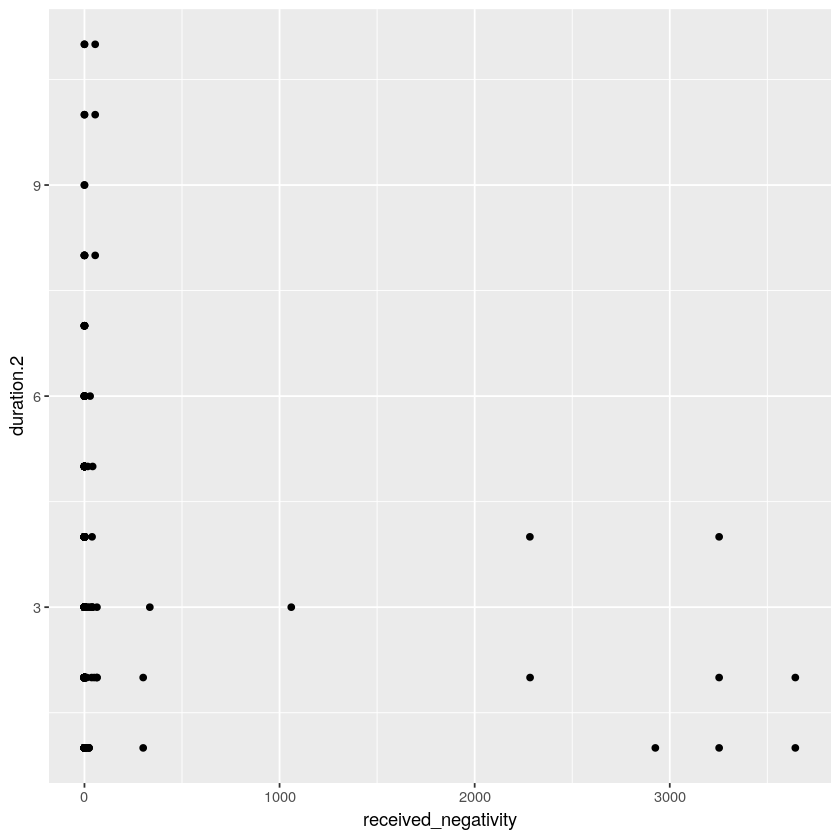

In [11]:
ggplot(analysis, aes(x = received_negativity, y = duration.2)) + 
  geom_point()

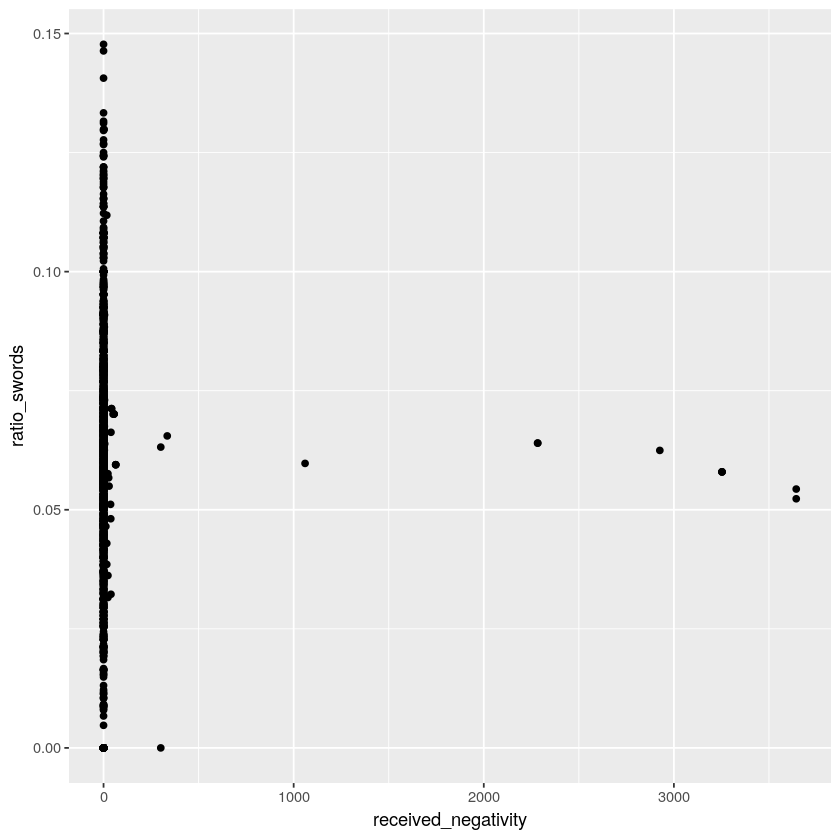

In [12]:
ggplot(analysis, aes(x = received_negativity, y = ratio_swords)) + 
  geom_point()

In [13]:
ggplot(analysis, aes(x = negativity.noads, y = ratio_swords)) + 
  geom_point()

In [13]:
cor(analysis)

,received_negativity,duration.2,ratio_swords
received_negativity,1.000000000,0.04473869,0.002963107
duration.2,0.044738686,1.00000000,0.015446175
ratio_swords,0.002963107,0.01544617,1.000000000


In [14]:
summary(analysis)

 received_negativity   duration.2      ratio_swords    
 Min.   :   0.00     Min.   : 1.000   Min.   :0.00000  
 1st Qu.:   0.00     1st Qu.: 1.000   1st Qu.:0.04453  
 Median :   0.00     Median : 1.000   Median :0.05882  
 Mean   :  13.04     Mean   : 1.436   Mean   :0.05668  
 3rd Qu.:   0.00     3rd Qu.: 1.000   3rd Qu.:0.07317  
 Max.   :3643.50     Max.   :11.000   Max.   :0.14773  

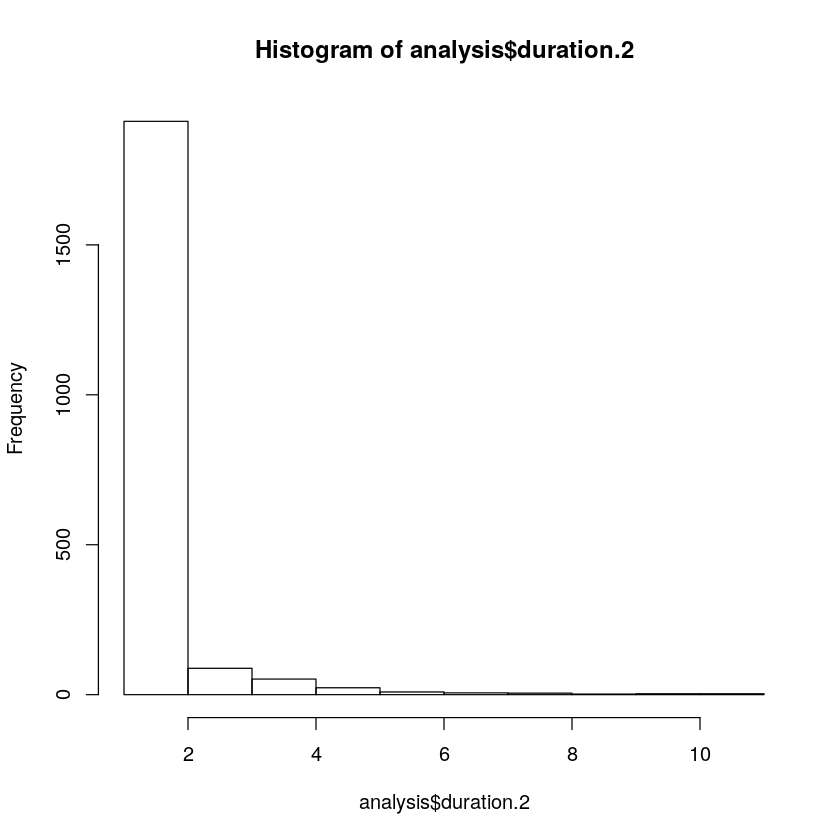

In [15]:
hist(analysis$duration.2)

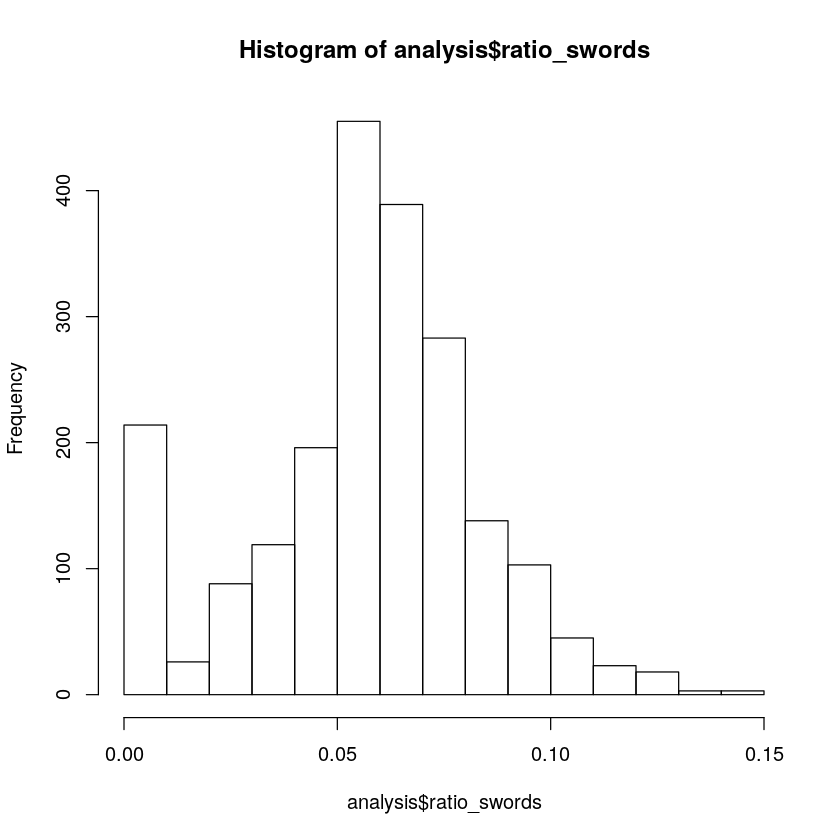

In [16]:
hist(analysis$ratio_swords)

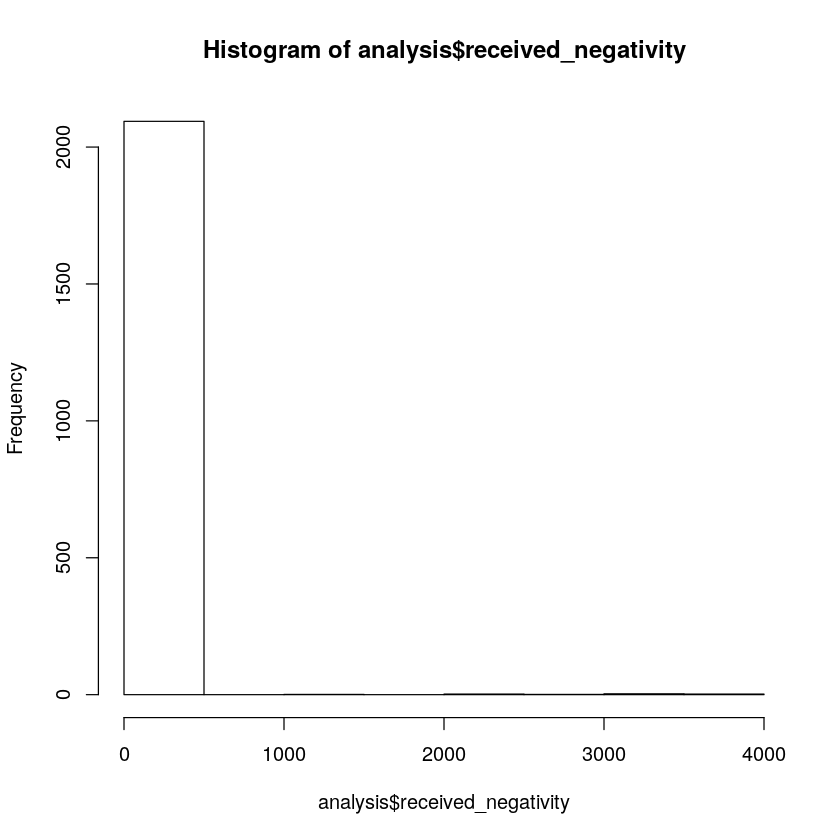

In [17]:
hist(analysis$received_negativity)

In [ ]:
hist(analysis$negativity.2)

In [ ]:
hist(analysis$negativity.noads)

In [ ]:
plot(analysis)

In [ ]:
analysis.sv <- svd(analysis)
plot(analysis.sv$u[, 1], sv$u[, 2], main = "SVD", xlab = "U1", ylab = "U2")